# Image enhancement using math operations

In this notebook, I will learn about :
1. Mathematical addition and multiplication operations
2. Thresholding and masking
3. Bitwise operations OR,AND and XOR

## Importing libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

# downloading the asset
import os
from zipfile import ZipFile
from urllib.request import urlretrieve
from IPython.display import Image

%matplotlib inline

## Addition and Subtraction

Addition means increasing the brightness and subtraction means decreasing the brightness

Text(0.5, 1.0, 'Brighter Image')

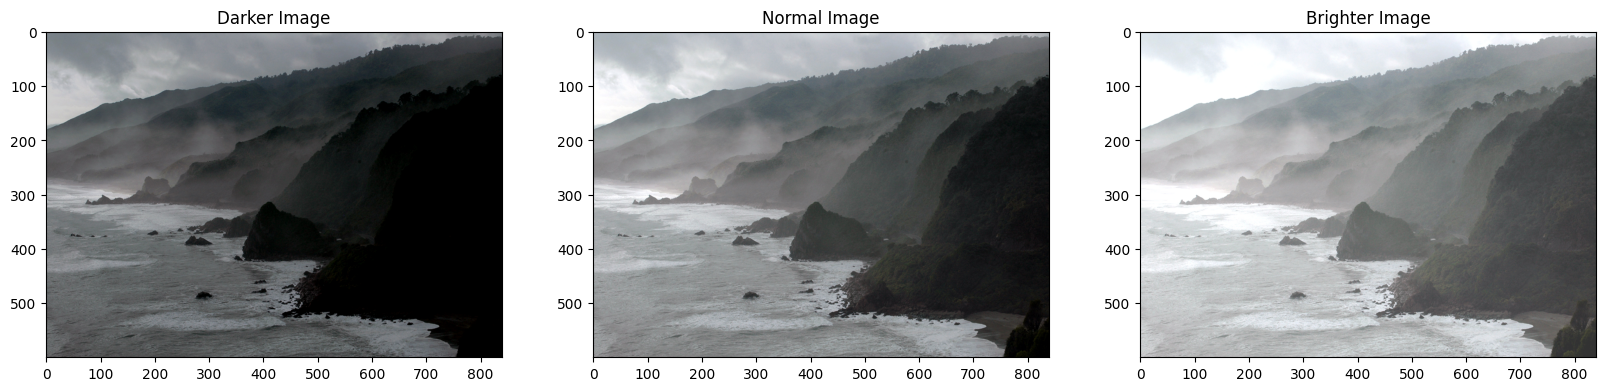

In [3]:
image_bgr = cv2.imread("images/New_Zealand_Coast.jpg",cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image_bgr,cv2.COLOR_BGR2RGB)

new_matrix = np.ones(image_rgb.shape,dtype="uint8") * 50

image_rgb_brighter = cv2.add(image_rgb,new_matrix)
image_rgb_darker = cv2.subtract(image_rgb,new_matrix)

plt.figure(figsize=(20,5))
plt.subplot(131);plt.imshow(image_rgb_darker);plt.title("Darker Image")
plt.subplot(132);plt.imshow(image_rgb);plt.title("Normal Image")
plt.subplot(133);plt.imshow(image_rgb_brighter);plt.title("Brighter Image")

## Multiplication

Multiplication is used to enhance the contrast of the image.

Text(0.5, 1.0, 'Brighter')

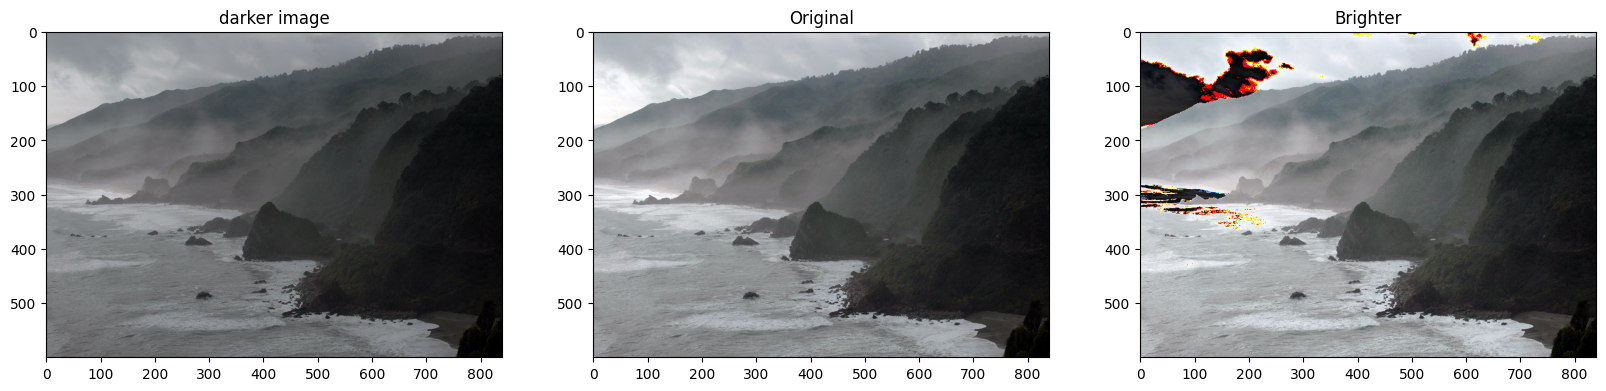

In [4]:
matrix_low = np.ones(image_rgb.shape) * 0.8
matrix_high = np.ones(image_rgb.shape) * 1.2

image_rgb_darker = np.uint8(cv2.multiply(np.float64(image_rgb),matrix_low))
image_rgb_brighter = np.uint8(cv2.multiply(np.float64(image_rgb),matrix_high))

plt.figure(figsize=(20,5))
plt.subplot(131);plt.imshow(image_rgb_darker);plt.title("darker image")
plt.subplot(132);plt.imshow(image_rgb);plt.title("Original")
plt.subplot(133);plt.imshow(image_rgb_brighter);plt.title("Brighter")

In the above brighter image, there are some unwanted weird colors after multiplying with `matrix_higher` it is because the normal image has already in high contrast and it is multiplied with the higher contrast which makes it overflown

Text(0.5, 1.0, 'Brighter')

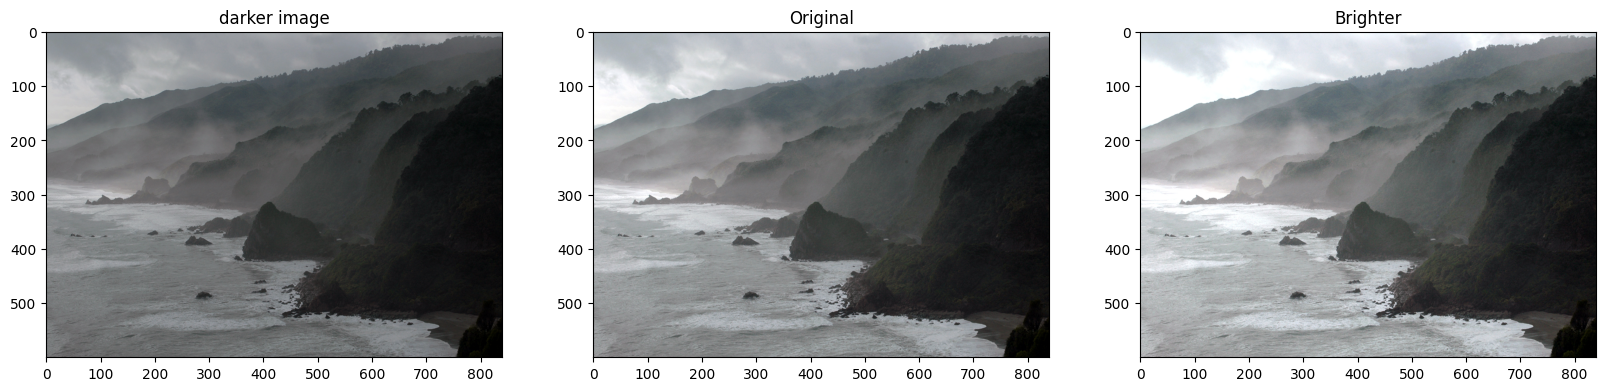

In [6]:
# dealing with the overflowing by using np.clip()
image_rgb_brighter = np.uint8(np.clip(cv2.multiply(np.float64(image_rgb), matrix_high), 0, 255))

plt.figure(figsize=(20,5))
plt.subplot(131);plt.imshow(image_rgb_darker);plt.title("darker image")
plt.subplot(132);plt.imshow(image_rgb);plt.title("Original")
plt.subplot(133);plt.imshow(image_rgb_brighter);plt.title("Brighter")

## Thresholding

Thresholding means converting a grayscale image into binary image. This binary image used for creaing mask. To create a threshold image we use `cv2.threshold()` function and the arguments are : 
1. src - image data
2. thresh - threshold value
3. maxval - maximum threshold value
4. type - threshold type

There is another function named `cv2.adaptiveThreshold()` and the arguments are :
1. src - image data
2. maxValue - max threshold value
3. adaptiveMethod - BORDER_REPLICATE | BORDER_ISOLATED for processing boundaries
4. thresholdType - it must be either THRESH_BINARY or THRESH_BINARY_INV
5. blockSize - size of the pixel neighborhood that is used to calculate the threshold value for the pixel, provide odd values like 3,5,7 etc..
6. C - constant subracted from the mean or weighted mean, it can be positive, negative or zero

Text(0.5, 1.0, 'Threshold image')

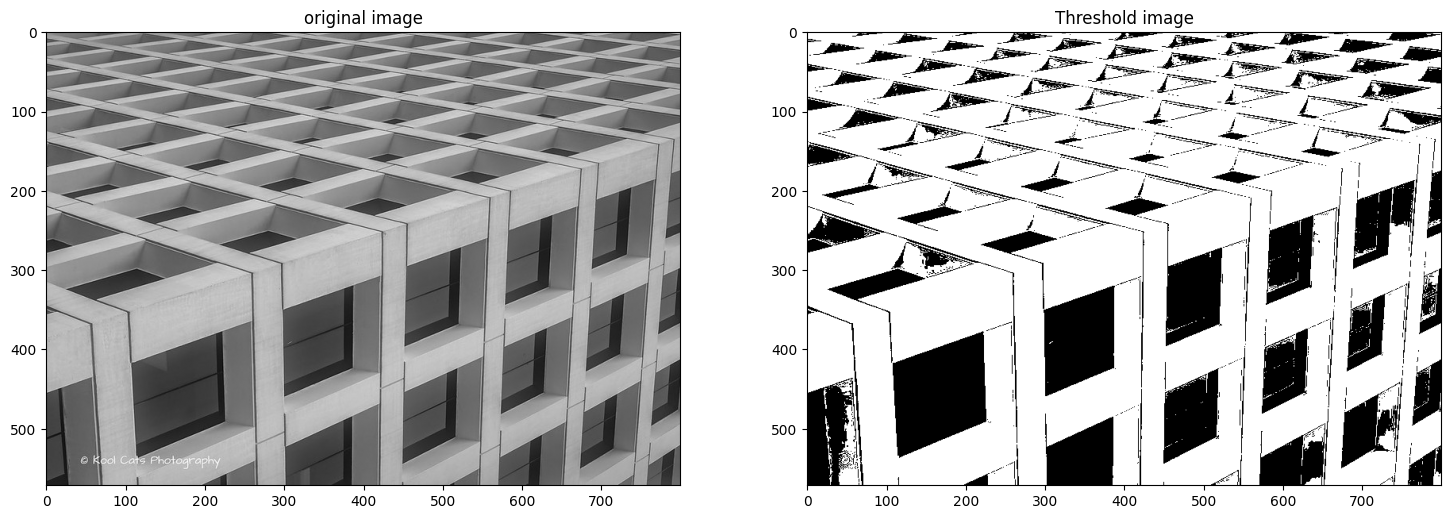

In [7]:
# displaying a threshold image
image = cv2.imread("images/building-windows.jpg",cv2.IMREAD_GRAYSCALE)
retval,image_thresh = cv2.threshold(image,100,255,cv2.THRESH_BINARY)

plt.figure(figsize=(18,9))
plt.subplot(121);plt.imshow(image,cmap="gray");plt.title("original image")
plt.subplot(122);plt.imshow(image_thresh,cmap="gray");plt.title("Threshold image")

Thresholding is the primary step in image preprocessing that is to seperate the important data from the background, in the above image, we seperated the building from the shadows.

## Bitwise operations

We do bitwise operations with these functions, `cv2.bitwise_and()` and `cv2.bitwise_or()` and `cv2.bitwise_xor()` and `cv2.bitwise_not()` and the following are the arguments : 
1. src1 - first input array
2. src2 - second input array
3. mask (optional but important) - 8 bit single channel array, it specifies the elements of the output array to be changed

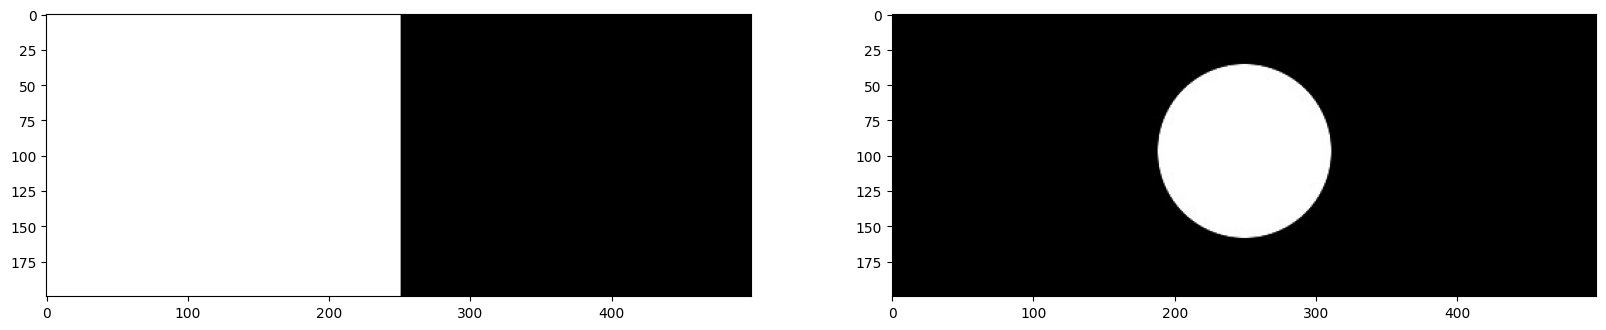

In [11]:
# displaying the image
image_rec = cv2.imread("images/rectangle.jpg",cv2.IMREAD_GRAYSCALE)
image_circle = cv2.imread("images/circle.jpg",cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(20,10))
plt.subplot(121);plt.imshow(image_rec,cmap="gray")
plt.subplot(122);plt.imshow(image_circle,cmap="gray")

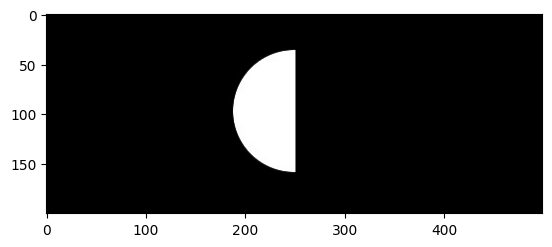

In [14]:
# bitwise and
res = cv2.bitwise_and(image_rec,image_circle,mask=None)
plt.imshow(res,cmap="gray")

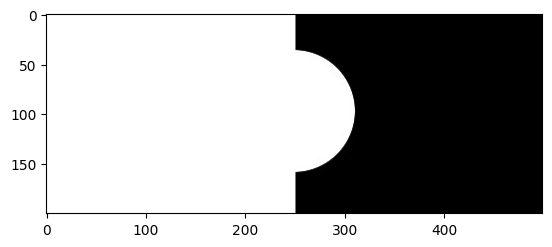

In [16]:
# bitwise or
res = cv2.bitwise_or(image_rec,image_circle,mask=None)
plt.imshow(res,cmap="gray")

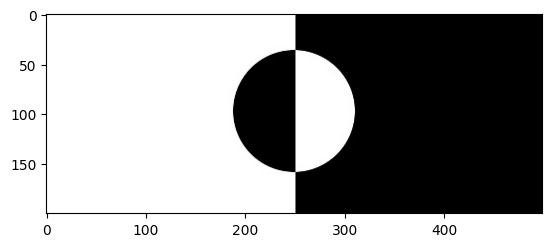

In [17]:
# bitwise xor
res = cv2.bitwise_xor(image_rec,image_circle,mask=None)
plt.imshow(res,cmap="gray")

## Logo Manipulation
Fun task !!!

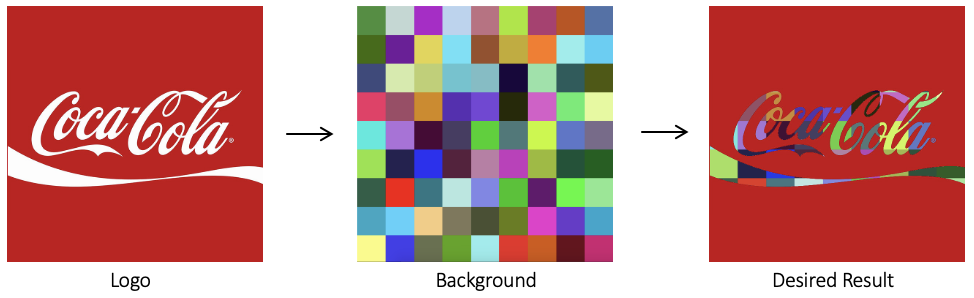

In [18]:
Image('images/Logo_Manipulation.png')

Text(0.5, 1.0, 'Background image')

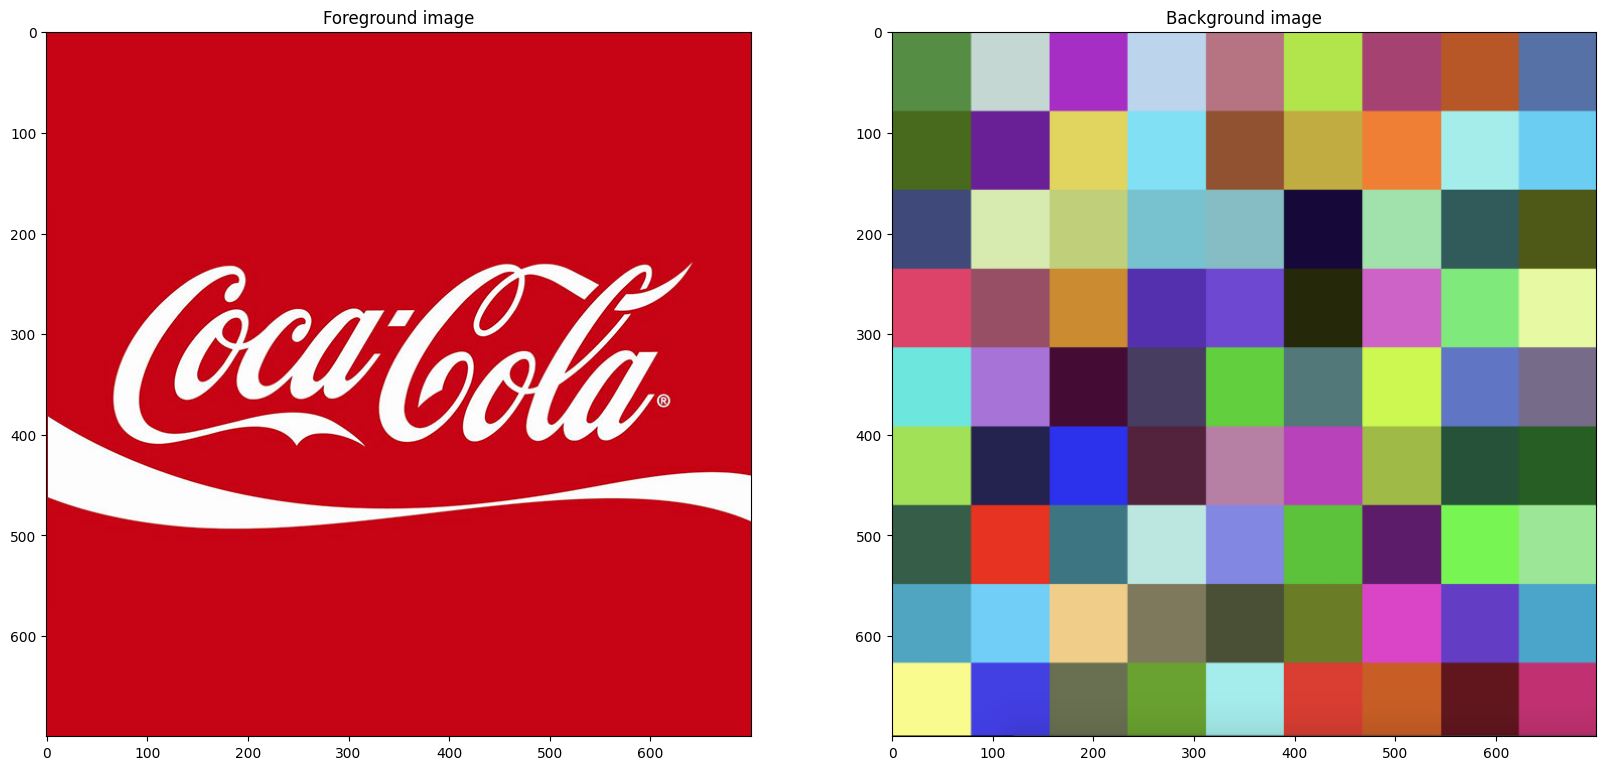

In [20]:
# reading front and back images
img_bgr = cv2.imread('images/coca-cola-logo.png')
img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)

logo_w = img_rgb.shape[0]
logo_h = img_rgb.shape[1]

img_back_bgr = cv2.imread('images/checkerboard_color.png')
img_back_rgb = cv2.cvtColor(img_back_bgr,cv2.COLOR_BGR2RGB)

# setting width and aspect ratio
aspect_ratio = logo_w / img_back_rgb.shape[1]
dim = (logo_w,int(img_back_rgb.shape[0] * aspect_ratio))

img_back_rgb = cv2.resize(img_back_rgb,dim,interpolation = cv2.INTER_AREA)

plt.figure(figsize=(20,10))
plt.subplot(121);plt.imshow(img_rgb);plt.title("Foreground image")
plt.subplot(122);plt.imshow(img_back_rgb);plt.title("Background image")

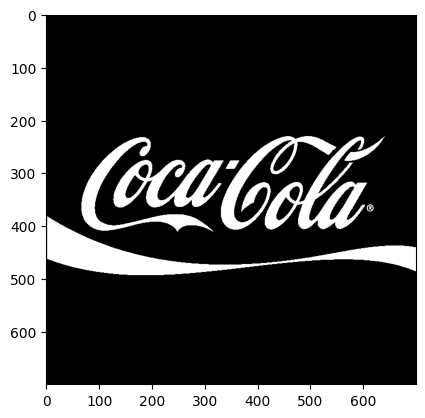

In [21]:
# creating the mask of foreground image
img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)
retval,img_mask = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)
plt.imshow(img_mask,cmap="gray")

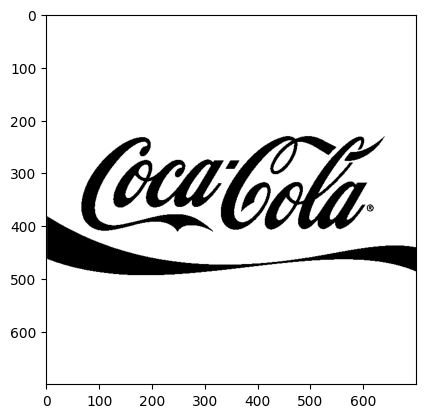

In [22]:
# invert the mask
img_mask_inv = cv2.bitwise_not(img_mask)
plt.imshow(img_mask_inv,cmap='gray')

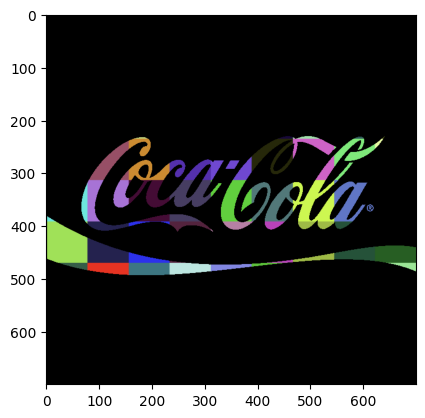

In [24]:
# applying the background in the mask
img_background = cv2.bitwise_and(img_back_rgb,img_back_rgb,mask=img_mask)
plt.imshow(img_background)

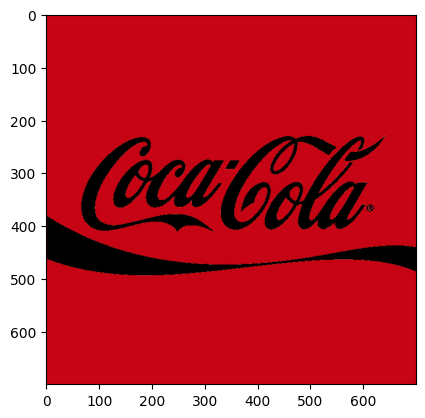

In [25]:
# isolating the foreground image
img_foreground = cv2.bitwise_and(img_rgb,img_rgb,mask=img_mask_inv)
plt.imshow(img_foreground)

True

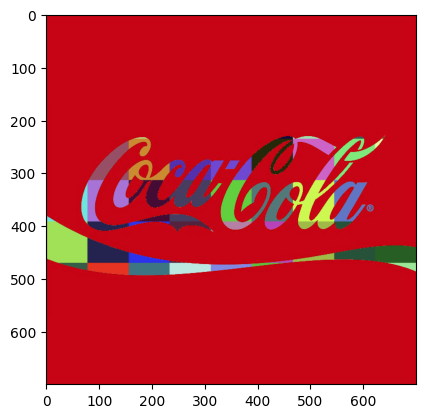

In [26]:
# merging foreground and background
res = cv2.add(img_background,img_foreground)
plt.imshow(res)
cv2.imwrite("images/logo_final.png",res[...,::-1])